In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df = pd.read_excel(r'C:\Users\Gexec\Desktop\New folder\New folder\Econometrics2022\Survey.xlsx')

In [4]:
df.head()

,interview__key,date_q,hh_02,settlement,members,memnal,weight,fdpurch,fdcons,fdout,...,hous_29_2n,hous_29_3n,hous_29_4n,hous_29_5n,hous_29_6n,hous_39,hous_44,soc_01,soc_05,hous_47_8
0,00-02-43-24,2019.09,6,1,4,4,156.330247,16142.559524,130.357143,0.0,...,0.0,0.0,0.0,0.0,1.0,1,4,2,NaN,NaN
1,00-02-53-94,2019.11,7,1,1,1,199.569444,15403.869048,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,1,3,2,NaN,1.0
2,00-02-68-45,2019.11,1,1,1,1,164.703704,44234.523810,0.000000,0.0,...,1.0,1.0,0.0,0.0,0.0,1,3,2,NaN,1.0
3,00-09-10-75,2019.11,8,1,3,3,185.768519,34283.928571,76.041667,0.0,...,0.0,1.0,0.0,0.0,0.0,1,3,2,NaN,NaN
4,00-10-58-42,2019.03,8,2,5,5,126.657407,22530.059524,12678.363641,0.0,...,0.0,1.0,0.0,0.0,0.0,2,5,1,NaN,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 65 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   interview__key    5165 non-null   object 
 1   date_q            5165 non-null   float64
 2   hh_02             5165 non-null   int64  
 3   settlement        5165 non-null   int64  
 4   members           5165 non-null   int64  
 5   memnal            5165 non-null   int64  
 6   weight            5165 non-null   float64
 7   fdpurch           5165 non-null   float64
 8   fdcons            5165 non-null   float64
 9   fdout             5165 non-null   float64
 10  Z1                5165 non-null   float64
 11  nfdpurch          5165 non-null   float64
 12  nonfdgif          5165 non-null   float64
 13  durble            5165 non-null   float64
 14  expend            5165 non-null   float64
 15  monincome         5165 non-null   float64
 16  totincome         5165 non-null   float64


In [6]:
df.isnull().sum()

interview__key       0
date_q               0
hh_02                0
settlement           0
members              0
                  ... 
hous_39              0
hous_44              0
soc_01               0
soc_05            4593
hous_47_8         1823
Length: 65, dtype: int64

In [7]:
df.describe()

,date_q,hh_02,settlement,members,memnal,weight,fdpurch,fdcons,fdout,Z1,...,hous_29_2n,hous_29_3n,hous_29_4n,hous_29_5n,hous_29_6n,hous_39,hous_44,soc_01,soc_05,hous_47_8
count,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,...,5107.000000,5149.000000,5092.000000,5090.000000,5093.000000,5165.000000,5165.000000,5165.000000,572.000000,3342.000000
mean,2019.065202,4.890997,1.374637,3.611617,3.409681,155.532817,54702.727893,8497.762933,2825.854441,3622.937588,...,0.186019,0.478928,0.001375,0.007662,0.340860,1.532043,2.904937,1.881897,877.486014,1.238181
std,0.034425,3.343538,0.484076,1.954404,1.894543,73.313942,41767.069890,15846.047589,10181.098053,2475.731163,...,0.389160,0.499604,0.037055,0.087206,0.474045,0.808306,0.740852,0.322761,17632.243041,0.482687
min,2019.010000,1.000000,1.000000,1.000000,1.000000,21.481481,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2019.040000,1.000000,1.000000,2.000000,2.000000,109.824074,25550.000000,0.000000,0.000000,1914.077381,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,3.000000,1.000000
50%,2019.070000,5.000000,1.000000,3.000000,3.000000,156.330247,44611.111111,1064.583333,0.000000,3017.656198,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,6.000000,1.000000
75%,2019.100000,8.000000,2.000000,5.000000,5.000000,192.638889,72761.011905,10430.597342,0.000000,4569.582184,...,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,3.000000,2.000000,10.000000,1.000000
max,2019.120000,11.000000,2.000000,15.000000,15.000000,326.879630,499923.263889,147600.133929,234642.857143,22711.973253,...,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,2.000000,420000.000000,3.000000


In [8]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

c:\Users\Gexec\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='members'>

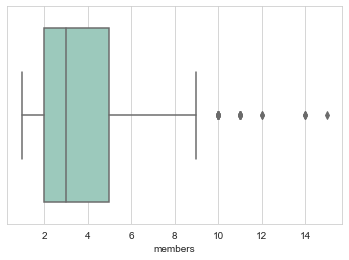

In [9]:
sns.boxplot(df['members'])

<AxesSubplot:xlabel='hh_02', ylabel='weight'>

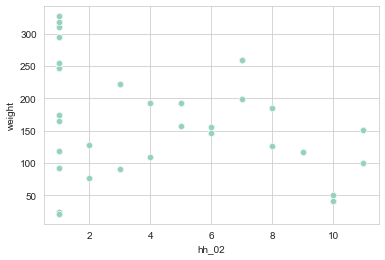

In [10]:
sns.scatterplot(data=df, x='hh_02', y='weight')

<AxesSubplot:xlabel='weight', ylabel='Count'>

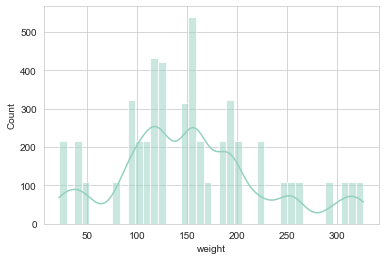

In [11]:
sns.histplot(data=df, x='weight', bins=40, kde=True)

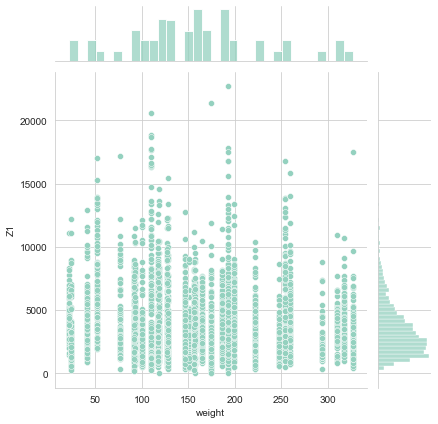

In [12]:
sns.jointplot(x='weight', y='Z1', data=df)

In [ ]:
sns.pairplot(df)

: 

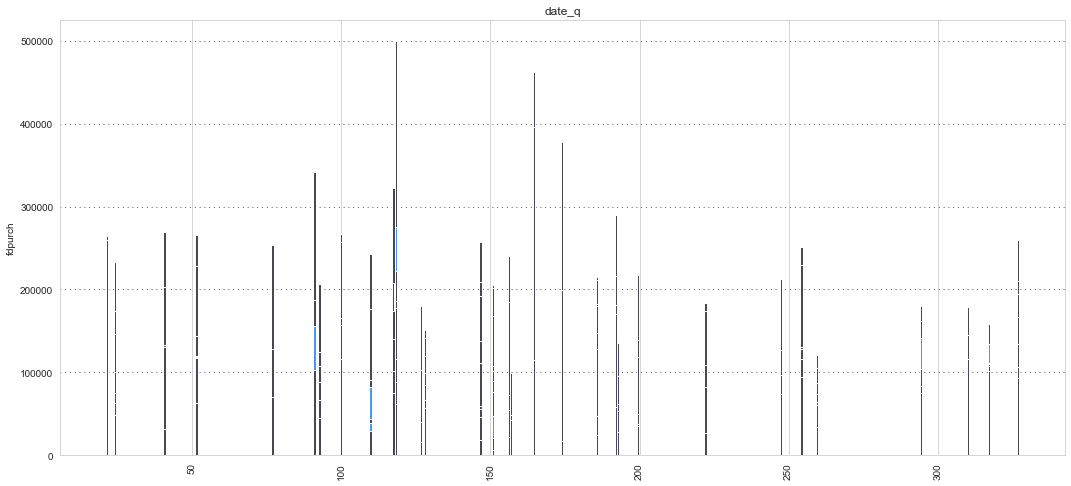

In [21]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
color_map = ["#4A4655" for _ in range(33)]
color_map[0] = "#4898EF"
plt.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.bar(df["weight"], df['fdpurch'],color=color_map)
plt.ylabel("fdpurch")
plt.title("date_q")
plt.show()

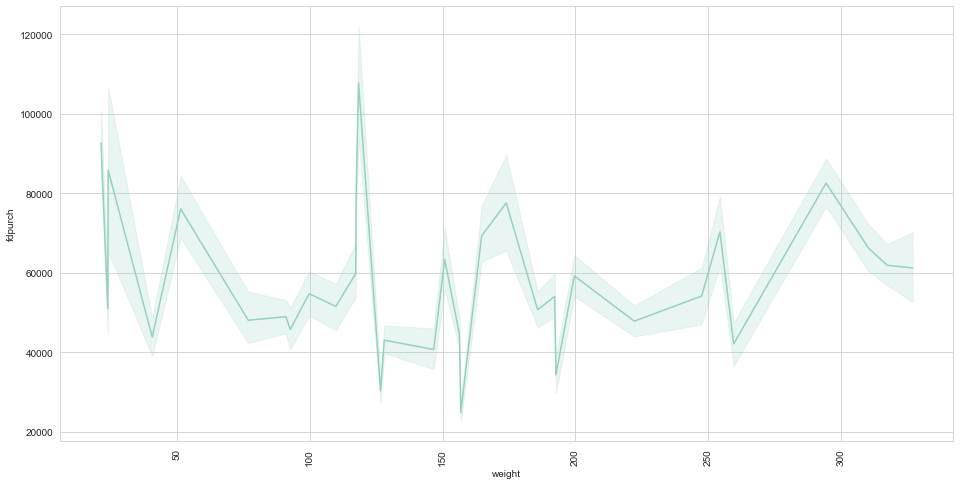

In [14]:
plt.figure(figsize = (16,8))
plt.xticks(rotation=90)
sns.lineplot(x="weight", y = "fdpurch", data = df)
plt.show()

In [15]:
df.columns

Index(['interview__key', 'date_q', 'hh_02', 'settlement', 'members', 'memnal',
       'weight', 'fdpurch', 'fdcons', 'fdout', 'Z1', 'nfdpurch', 'nonfdgif',
       'durble', 'expend', 'monincome', 'totincome', 'nonmoninc',
       'y1_3amd.1.00', 'y1_3amd.2.00', 'y1_3amd.3.00', 'y1_3amd.4.00',
       'y1_3amd.6.00', 'y1_3amd.8.00', 'y1_3amd.9.00', 'y1_3amd.10.00',
       'y1_3amd.13.00', 'y1_3amd.14.00', 'y1_3amd.15.00', 'y1_3amd.17.00',
       'y1_3amd.18.00', 'y1_3amd.19.00', 'y1_3amd.23.00', 'y1_3amd.28.00',
       'hhch_0_3_sum', 'hhch_4_5_sum', 'hhch_6_11_sum', 'hhch_12_17_sum',
       'hheld_63_65_sum', 'hheld_66_70_sum', 'hheld_71_80_sum',
       'hheld_over81_sum', 'hheld_over63_sum', 'headsex', 'headeduc',
       'headmerstatus', 'headage', 'aec_r', 'poverty', 'pweight', 'ae_r',
       'hous_01', 'hous_13', 'hous_16', 'hous_29_1n', 'hous_29_2n',
       'hous_29_3n', 'hous_29_4n', 'hous_29_5n', 'hous_29_6n', 'hous_39',
       'hous_44', 'soc_01', 'soc_05', 'hous_47_8'],
      dty

In [16]:
df_5 = df.nlargest(5, 'fdcons')
df_5

,interview__key,date_q,hh_02,settlement,members,memnal,weight,fdpurch,fdcons,fdout,...,hous_29_2n,hous_29_3n,hous_29_4n,hous_29_5n,hous_29_6n,hous_39,hous_44,soc_01,soc_05,hous_47_8
676,12-96-83-81,2019.01,6,2,6,6,146.666667,4127.976190,147600.133929,0.000000,...,0.0,0.0,0.0,0.0,1.0,2,3,1,3.0,NaN
4885,94-45-38-72,2019.03,11,2,5,5,99.796296,62462.797619,140539.608347,4345.238095,...,0.0,0.0,0.0,0.0,1.0,4,3,2,NaN,NaN
3498,67-92-09-91,2019.12,6,1,4,4,156.330247,11071.666667,135622.158183,16577.083333,...,0.0,1.0,0.0,0.0,0.0,1,3,2,NaN,1.0
4193,81-14-05-89,2019.04,10,2,3,3,40.745370,40519.345238,135402.504399,0.000000,...,0.0,1.0,0.0,1.0,0.0,1,2,2,NaN,1.0
5131,99-31-15-32,2019.01,6,2,6,6,146.666667,0.000000,133383.358585,0.000000,...,0.0,0.0,0.0,0.0,1.0,1,3,1,16.0,2.0


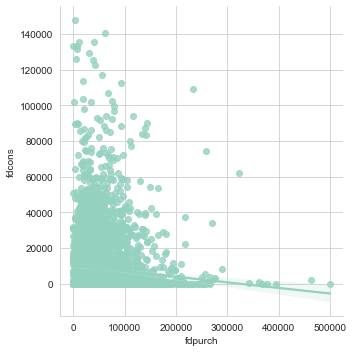

In [17]:
sns.lmplot(x='fdpurch', y = 'fdcons', data=df)

In [18]:
df.corr()

,date_q,hh_02,settlement,members,memnal,weight,fdpurch,fdcons,fdout,Z1,...,hous_29_2n,hous_29_3n,hous_29_4n,hous_29_5n,hous_29_6n,hous_39,hous_44,soc_01,soc_05,hous_47_8
date_q,1.000000,0.002320,0.001203,0.014408,0.003747,-0.001881,0.121958,-0.070970,0.001732,-0.176182,...,0.069694,0.020468,0.002416,-0.063418,0.080817,-0.041727,-0.037096,0.009297,-0.062693,-0.040302
hh_02,0.002320,1.000000,0.338585,0.012249,-0.005819,-0.341276,-0.092547,0.295483,-0.175435,-0.016726,...,-0.160687,-0.222390,0.007008,0.071129,0.331555,0.210912,0.011764,-0.049973,-0.067411,-0.109739
settlement,0.001203,0.338585,1.000000,0.130696,0.098665,-0.114526,-0.209423,0.461581,-0.145519,-0.050233,...,-0.311690,-0.367872,0.025605,0.103149,0.590957,0.601064,0.127944,-0.050161,-0.037909,-0.117268
members,0.014408,0.012249,0.130696,1.000000,0.961250,-0.022099,0.376925,0.247824,0.063265,0.346611,...,-0.147121,-0.009510,0.015420,0.012734,0.130294,0.064021,-0.071645,-0.071808,0.013976,-0.028391
memnal,0.003747,-0.005819,0.098665,0.961250,1.000000,-0.013877,0.402036,0.236872,0.079242,0.351695,...,-0.130004,0.001378,0.014307,0.015451,0.106414,0.043778,-0.070618,-0.075718,-0.000560,-0.024639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hous_39,-0.041727,0.210912,0.601064,0.064021,0.043778,-0.088741,-0.147499,0.297122,-0.102871,0.025496,...,-0.222565,-0.245877,0.014542,0.097096,0.375895,1.000000,0.122958,-0.029285,0.070199,-0.077320
hous_44,-0.037096,0.011764,0.127944,-0.071645,-0.070618,0.071628,-0.207203,0.056087,-0.082200,-0.146010,...,0.017025,-0.233308,0.004673,0.017106,0.201821,0.122958,1.000000,-0.166818,-0.067819,0.111612
soc_01,0.009297,-0.049973,-0.050161,-0.071808,-0.075718,0.013861,0.127498,-0.030051,0.077577,0.031118,...,0.003263,0.091274,-0.002732,-0.002482,-0.068370,-0.029285,-0.166818,1.000000,NaN,0.001142
soc_05,-0.062693,-0.067411,-0.037909,0.013976,-0.000560,0.072630,-0.009804,-0.028064,-0.011340,0.052579,...,-0.019071,0.054093,-0.002082,-0.004158,-0.037684,0.070199,-0.067819,NaN,1.000000,-0.026527


Text(0.5, 1.0, 'Correlation Heatmap')

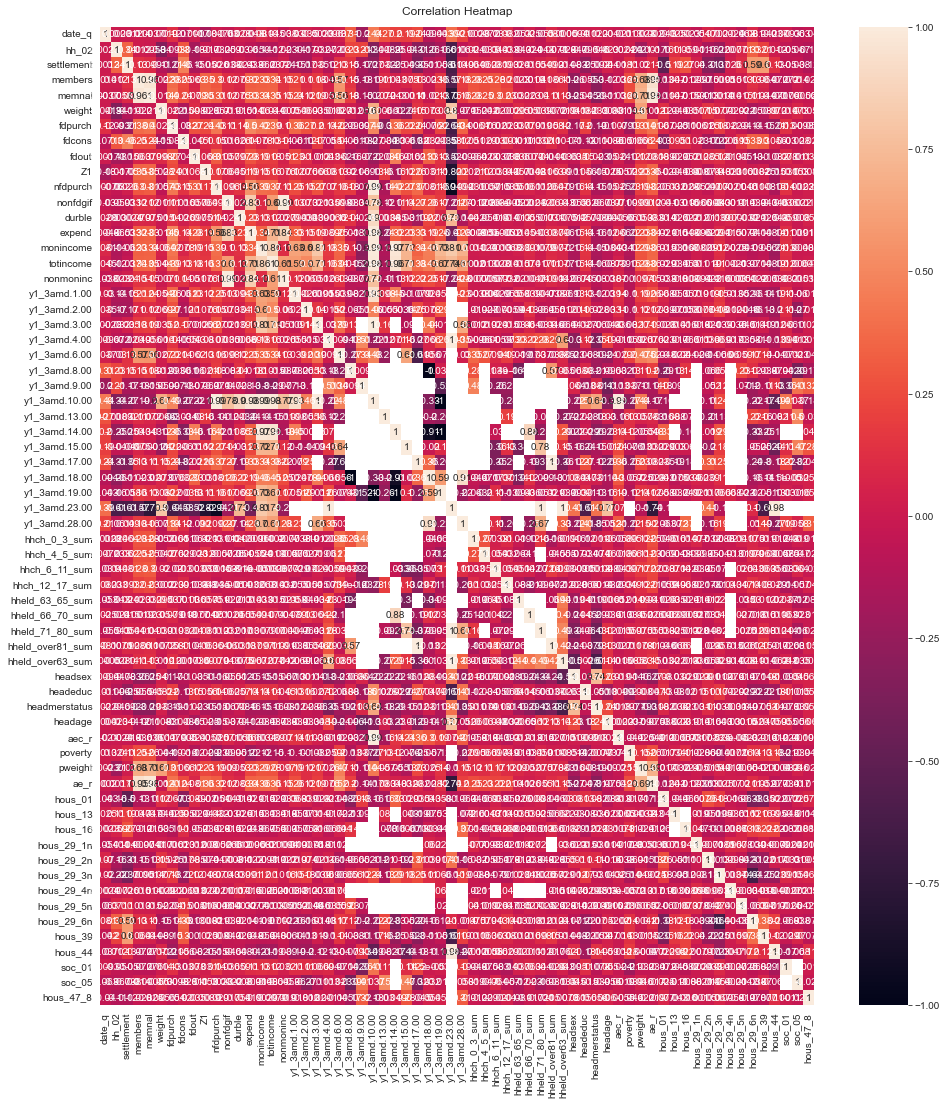

In [19]:
plt.figure(figsize=(16, 18))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [20]:
df.columns

Index(['interview__key', 'date_q', 'hh_02', 'settlement', 'members', 'memnal',
       'weight', 'fdpurch', 'fdcons', 'fdout', 'Z1', 'nfdpurch', 'nonfdgif',
       'durble', 'expend', 'monincome', 'totincome', 'nonmoninc',
       'y1_3amd.1.00', 'y1_3amd.2.00', 'y1_3amd.3.00', 'y1_3amd.4.00',
       'y1_3amd.6.00', 'y1_3amd.8.00', 'y1_3amd.9.00', 'y1_3amd.10.00',
       'y1_3amd.13.00', 'y1_3amd.14.00', 'y1_3amd.15.00', 'y1_3amd.17.00',
       'y1_3amd.18.00', 'y1_3amd.19.00', 'y1_3amd.23.00', 'y1_3amd.28.00',
       'hhch_0_3_sum', 'hhch_4_5_sum', 'hhch_6_11_sum', 'hhch_12_17_sum',
       'hheld_63_65_sum', 'hheld_66_70_sum', 'hheld_71_80_sum',
       'hheld_over81_sum', 'hheld_over63_sum', 'headsex', 'headeduc',
       'headmerstatus', 'headage', 'aec_r', 'poverty', 'pweight', 'ae_r',
       'hous_01', 'hous_13', 'hous_16', 'hous_29_1n', 'hous_29_2n',
       'hous_29_3n', 'hous_29_4n', 'hous_29_5n', 'hous_29_6n', 'hous_39',
       'hous_44', 'soc_01', 'soc_05', 'hous_47_8'],
      dty

In [23]:
y = df['headage']
x = df[['headsex',
        'headeduc',
        'poverty']]

x = sm.add_constant(x)
x.head()

,const,headsex,headeduc,poverty
0,1.0,2.0,3.0,3
1,1.0,2.0,5.0,1
2,1.0,2.0,6.0,1
3,1.0,1.0,3.0,2
4,1.0,1.0,4.0,2


In [1]:
model = sm.OLS(y, x)
result = model.fit()
result.summary()

NameError: name 'sm' is not defined

In [2]:
result.params

NameError: name 'result' is not defined

In [30]:
sns.histplot(result.resid)

NameError: name 'result' is not defined

In [31]:
sns.boxplot(x=result.resid, showmeans=True)

NameError: name 'result' is not defined

In [32]:
for i in range(4):
    sm.graphics.plot_fit(result, i, vlines=False)

NameError: name 'result' is not defined